Algoritmos

In [58]:
'''
Implemente dois algoritmos para obter a mediana de uma lista de elementos. 
Um dos algoritmos deve ser baseado no método força bruta e o outro no método diminuir para conquistar. 
Os dois algoritmos devem ser implementados em Python (sem utilizar nenhuma biblioteca externa). 
Eles devem receber como parâmetro uma lista de elementos e devem retornar a mediana da lista. 
Você também deve montar um experimento que permita comparar o desempenho dos dois algoritmos através de um gráfico. 
Você deve entregar um arquivo no formato PDF, contendo:
1) O código dos dois algoritmos;
1) O valor do domínio;
2) A figura gerada pelo experimento e que permite comparar os dois algoritmos.
'''

def BubbleSort(A):
    for i in range(len(A)-1,0,-1):
        for j in range(i):
            if A[i]<A[j]:
                Swap(A,j,i)

def Mediana_NaiveSelect(A):
    A.sort()  

def Swap (A,i,j):
    temp=A[i]
    A[i]=A[j]
    A[j]=temp

def LomutoPartition(A,l,r):
    p=A[l]
    s=l
    for i in range(l+1,r):
        if A[i]<p:
            s=s+1
            Swap(A,s,i)
    Swap(A,A[l],A[s])
    return s

def LomutoPartition2(A,l,r):
   p=A[l]
   s=l
   for i in range(l+1,r):
        while s <= r and A[s] <= p:
            s=s+1
        while A[r] >= p and r >= s:
           r=r-1
        if r>s:
            Swap(A,s,r)
   Swap(A,A[l],A[r])
   return r
   
def Mediana_QuickSelect(A):
    return _QuickSelect(A,0,len(A)-1,(len(A)+1)//2)

def _QuickSelect(A,l,r,k):
    s=LomutoPartition(A,l,r)
    if(s==k-1):
        return A[s]
    else:
        if(s>k-1):
            return _QuickSelect(A,l,s-1,k)
        else:
            return _QuickSelect(A,s+1,r,k)
    return
            
#testando...    
L = [10,9,8,7,6,5,4,3,2,1,0]
print("Lista original.............:",L)

L = [10,9,8,7,6,5,4,3,2,1,0] #garantindo valores originais da lista
BubbleSort(L)
print("Lista BubbleSort ordenado..:",L)

L = [10,9,8,7,6,5,4,3,2,1,0] #garantindo valores originais da lista
Mediana_NaiveSelect(L)
print("Lista NaiveSelect ordenado.:",L)

L = [10,9,8,7,6,5,4,3,2,1,0] #garantindo valores originais da lista
Mediana_QuickSelect(L)
print("Lista QuickSelect ordenado.:",L)


Lista original.............: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Lista BubbleSort ordenado..: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Lista NaiveSelect ordenado.: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Lista QuickSelect ordenado.: [10, 0, 8, 9, 6, 7, 4, 3, 2, 1, 5]


Coleta de dados dos experimentos

In [61]:
import time
from numpy import random

#Você deve escolher um valor mais adequado
DOMAIN = 100 
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [BubbleSort, Mediana_NaiveSelect,Mediana_QuickSelect]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 1000 

sizes = [5,10,15,20,25] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  #Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting experiments for datasets with size=5, each experiment has 1000 rounds.


IndexError: ignored

Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
BubbleSort##5,3.979445e-06,BubbleSort,5
Mediana_NaiveSelect##5,7.565022e-07,Mediana_NaiveSelect,5
BubbleSort##10,9.581566e-06,BubbleSort,10
Mediana_NaiveSelect##10,1.818657e-06,Mediana_NaiveSelect,10
BubbleSort##15,1.898289e-05,BubbleSort,15
Mediana_NaiveSelect##15,1.624107e-06,Mediana_NaiveSelect,15
BubbleSort##20,3.522992e-05,BubbleSort,20
Mediana_NaiveSelect##20,2.255440e-06,Mediana_NaiveSelect,20
BubbleSort##25,4.735947e-05,BubbleSort,25
Mediana_NaiveSelect##25,3.033876e-06,Mediana_NaiveSelect,25


Resultado do experimento (gráfico)

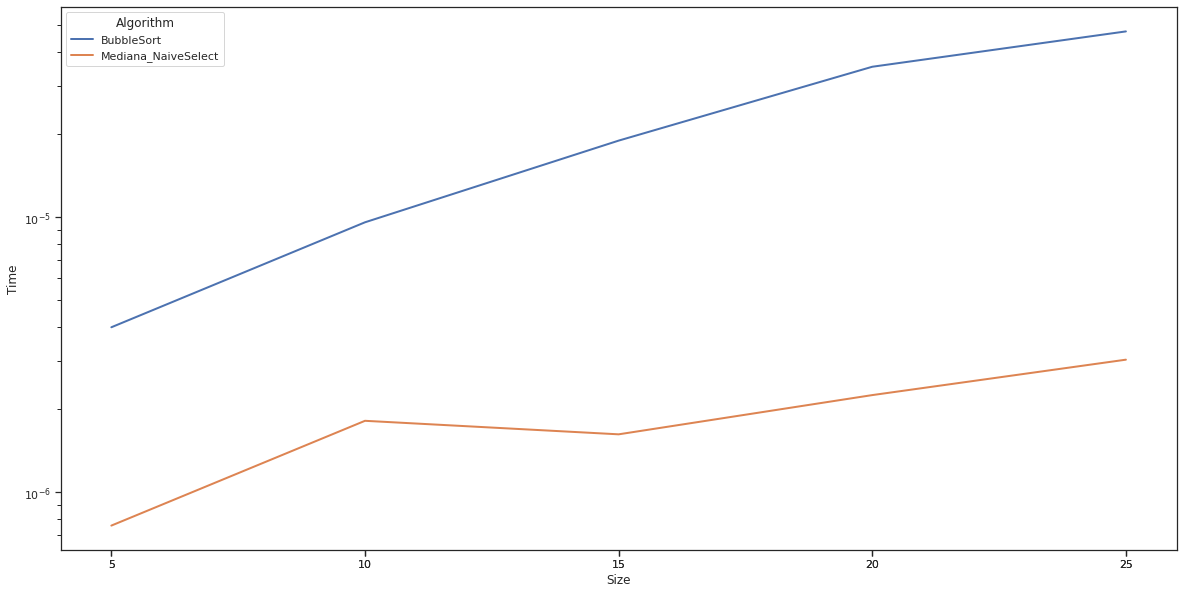

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
 
##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})
 
##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]
 
g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()